## 특성(Feature/Attribute)공학과 규제(Regularization : 정형화, 규제, 일반화): 규제 -> 일반화 -> 정형화
![](../Data/d.png)
- 과대적합이면 일반화가 안된다.(사용할 수 없음), 곡선을 그리다 : 학습은 잘되지만, 일반화는 안된다.
- 규제를 가해서 오차를 포함하여 직선을 그리다 : 학습은 높지 않지만 일반화 할 수 있다.

In [40]:
import pandas as pd

In [41]:
df = pd.read_csv("../Data/fish.csv")
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


> 길이,높이,두께로 구성된 Data

In [42]:
# Numpy로 변환
fish_full = df.to_numpy()
fish_full[0:6]
# numpy로 바꾸면 2차원으로 바뀐다.

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32]])

In [43]:
df = pd.read_csv("../data/fish_weight.csv")
df.head()

,weight
0,5.9
1,32.0
2,40.0
3,51.5
4,70.0


In [44]:
fish_weight = df.to_numpy()
fish_weight[0:6]
# numpy로 바꾸면 2차원으로 바뀐다.

array([[  5.9],
       [ 32. ],
       [ 40. ],
       [ 51.5],
       [ 70. ],
       [100. ]])

In [45]:
# Train과 Test로 분리
from sklearn.model_selection import train_test_split

In [46]:
train_input, test_input, train_target, test_target = train_test_split \
    (fish_full, fish_weight, random_state=42)

In [47]:
# 다중회귀 분석
from sklearn.preprocessing import PolynomialFeatures

---
## 다항 특성 만들기 연습 ??????????????????????????????????????????????????????????????????????

In [48]:
poly = PolynomialFeatures()


In [49]:
poly.fit([[2,3]]) # 생선이랑 관련없음 그냥 적은거임

PolynomialFeatures()

In [50]:
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


> 1 : 절편     
> 2 : 원래X값      
> 3 : 원래Y값       
> 4 : 2^2    
> 6 : X*Y    
> 9 : Y^2       
절편이 발생하는 경우 Y=ax+b --> Y=aX+b1의 구조             
[a,b] * [x,1]

In [51]:
# 절편이 필요없는 경우
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]]) # 생선이랑 관련없음 그냥 적은거임
print(poly.transform([[2,3]]))
# 1이 안나온다.

[[2. 3. 4. 6. 9.]]


---
## 다항 특성 만들기

In [52]:
# train_input으로 다항 특성 만들기
poly = PolynomialFeatures(include_bias=False) # degree = 2 <= default
poly.fit(train_input)
train_poly = poly.transform(train_input)


In [53]:
train_poly.shape

(42, 9)

> 컬럼수가 원래는 3개였는데 9개로 확장되었다.

In [54]:
# 컬럼 정보 확인 
poly.get_feature_names()
# 아래의 내용 참고

['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

![](../Data/e.png)

In [55]:
# test_input을 다항 특성 만들기
test_poly = poly.transform(test_input)

---
## 다중 회귀 모델 훈련하기

In [56]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print("train score", lr.score(train_poly, train_target))
print("test score", lr.score(test_poly, test_target))

train score 0.9903183436982125
test score 0.9714559911594155


---
## 더많은 특성 만들기

In [57]:
poly =PolynomialFeatures(degree=5, include_bias=False)
train_poly =poly.fit_transform(train_input)
test_poly = poly.transform(test_input)

In [58]:
print(train_poly.shape, test_poly.shape)

(42, 55) (14, 55)


In [59]:
# 컬럼 정보 확인
poly.get_feature_names()

['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [60]:
# 모델 확인하기
lr.fit(train_poly, train_target)
print("train score :", lr.score(train_poly, train_target))
print('test score :', lr.score(test_poly,test_target))

train score : 0.9999999999938143
test score : -144.40744533753661


> train의 경우는 거의 완벽하지만 test는 엉망이다.          
> 과대적합이 발생하였다.             
> 이런 경우 사용하는 것이 규제이다.          

---
## 규제(Regularization : 정형화, 규제, 일반화)
- 모델이 과적합되게 학습하지 않고 일반성을 가질 수 있도록 규제(정규화) 하는것. 
![](../Data/f.png)

## 규제 전에 표준화
: 표준점수(Z점수)를 sklearn을 사용

In [61]:
from sklearn.preprocessing import StandardScaler
ss =StandardScaler()
train_scaled =ss.fit_transform(train_poly)
test_scaled = ss.transform(test_poly)

## Ridge규제(L2규제)
: 가중치의 제곱으로 규제하는 방법이다.

In [63]:
from sklearn.linear_model import Ridge
ridge =Ridge()
ridge.fit(train_scaled, train_target)
print("train score :", ridge.score(train_scaled,train_target))
print("test score :", ridge.score(test_scaled,test_target))


train score : 0.9896101671037343
test score : 0.9790693977615386


In [64]:
# 적정한 규제 강도 (Hyper Parameter) 찾기
train_score= []
test_score= []

alpha_list = [0.001,0.01,0.1,1,10,100]# 임의로 정헌다, 데이터의 크기에따라 달라진다.
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)

    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

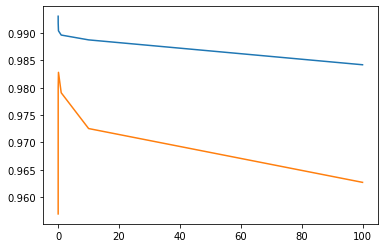

In [66]:
# 시각화 해보기
import matplotlib.pyplot as plt

plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)

plt.show()

> x축의 데이터 범위가 너무 커서 소수인 경우에는 확인할 수 없음        
> train과test사이가 점점 벌어져서 좋지 않다.    
> log를 사용해 데이ㅓ 범위의 축소 및 규칙화      

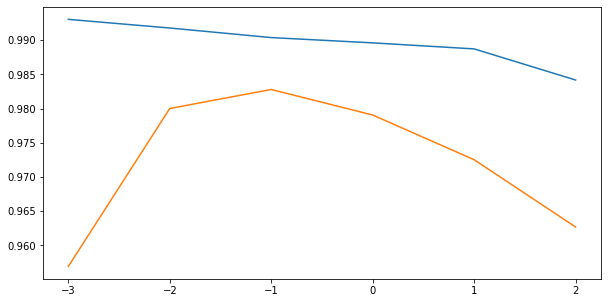

In [67]:
# 시각화 하기
import numpy as np

plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.show()

> alpha가 -1인 경우가 train과 test의 간격이 제일 가깝다 (골디락스(Goldilocks)지점), 제일 좋다      
> 시각화 상의 -1은 우리가 정의한 0.1이다.        

In [68]:
ridge =Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print("train score :", ridge.score(train_scaled,train_target))
print("test score :", ridge.score(test_scaled,test_target))

train score : 0.9903815817570368
test score : 0.9827976465386896


---
## Lasso(L1규제)
Lasso 규제는 가중치의 절대값(음수때문에 사용한다.)으로 규제하는 방법

In [69]:
from sklearn.linear_model import Lasso

lasso =Lasso()
lasso.fit(train_scaled, train_target)
print('train score:', lasso.score(train_scaled, train_target))
print('test score:', lasso.score(test_scaled, test_target))

train score: 0.989789897208096
test score: 0.9800593698421886


In [71]:
# 적정한 규제 강도 (Hyper Parameter) 찾기
train_score= []
test_score= []

alpha_list = [0.001,0.01,0.1,1,10,100]# 임의로 정헌다, 데이터의 크기에따라 달라진다.
for alpha in alpha_list:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled,train_target)

    train_score.append(lasso.score(train_scaled,train_target))
    test_score.append(lasso.score(test_scaled,test_target))

/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23364.07596994002, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20251.975097474788, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(
/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 806.2370926334916, tolerance: 518.2793833333334
  model = cd_fast.enet_coordinate_descent(


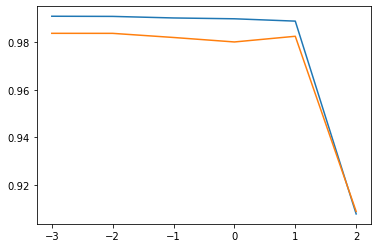

In [72]:
# 시각화 하기
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)

plt.show()

In [73]:
lasso =Lasso(alpha=10)
lasso.fit(train_scaled, train_target)
print('train score:', lasso.score(train_scaled, train_target))
print('test score:', lasso.score(test_scaled, test_target))

train score: 0.9888067471131866
test score: 0.9824470598706695


In [74]:
# 기울기가 0으로 만든 횟수 출력
np.sum(lasso.coef_ == 0)

40

In [75]:
np.sum(ridge.coef_ == 0)
# L2규제를 많이 쓴다. ridge를 많이 사용한다.

0

In [76]:
print(ridge.coef_, ridge.intercept_)

[[ 27.61933479  -1.64022156 -19.73256036  30.03061951  16.99800255
   17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
   17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
    5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
   14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
   19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
   -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
   13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
   37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
    0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
   -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]] [400.83333333]


In [78]:
print(lasso.coef_, lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ] [400.83333333]


: 신기하게 절편은 둘이 똑같다.